### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [2]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
print(reviews.info())
#print(reviews.dtypes)
reviews.head()                      
                      
                      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB
None


,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [3]:
# Determine if there are any missing values in the data set
reviews.isnull().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [4]:
# Descriptive statistics.
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


- From the descriptive statistics, we can see that the average age of customers is 39.5 years. The maximum age is 72. 
- The maximum remuneration is £112.34. 
- The highest accumulated loyalty points is 6847. The minimum is 25 points. 

In [5]:
reviews[reviews['loyalty_points']== reviews['loyalty_points'].max()]

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
1871,Female,45,112.34,83,6847,diploma,EN,Web,3478,I love this game. It is so much fun. You will ...,I love this game


In [6]:
reviews[reviews['loyalty_points']== reviews['loyalty_points'].min()]

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
1401,Male,23,15.58,3,25,graduate,EN,Web,760,One of the best board games I played in along ...,Five Stars


In [7]:
reviews.loc[reviews['loyalty_points'] <100]

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
6,Female,37,14.76,6,61,diploma,EN,Web,979,"I have bought many gm screens over the years, ...",Best gm screen ever
8,Male,66,15.58,3,31,PhD,EN,Web,1031,Could be better but its still great. I love th...,Great but could be even better
22,Female,44,20.50,5,75,postgraduate,EN,Web,1307,While my 3 year old son liked th tattos you'd ...,Not enough product
30,Male,62,24.60,4,69,PhD,EN,Web,2162,The stained glass pages are pretty cool. And i...,Nice book
...,...,...,...,...,...,...,...,...,...,...,...
1902,Male,69,24.60,4,62,PhD,EN,Web,2877,"Exellent little dictionary, much needed when p...",A Happy Customer!
1960,Female,55,13.12,6,58,graduate,EN,Web,4415,We are avid Quiddler players and this dictiona...,Great resource
1964,Male,49,14.76,6,66,Basic,EN,Web,8962,Fun. Good service.,Fun. Good service
1966,Male,40,15.58,3,33,PhD,EN,Web,9080,This is a great tool to have at hand when play...,Great Helper


 The spending score and loyalty points seems to have a correlation, the higher the spending score, more loyalty points. This needs to be investigated further. 

## 2. Drop columns

In [8]:
# Drop unnecessary columns.
reviews_df = reviews.drop(['language','platform'],axis=1)

# View column names.
reviews_df.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


## 3. Rename columns

In [9]:
# Rename the column headers.
reviews_df.rename(columns= {'remuneration (k£)' : 'remuneration',\
                         'spending_score (1-100)' : 'spending_score'},
              inplace=True)

# View column names.
reviews_df.columns.values


array(['gender', 'age', 'remuneration', 'spending_score',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype=object)

## 4. Save the DataFrame as a CSV file

In [10]:
# Create a CSV file as output.
reviews_df.to_csv('reviews_final.csv',index=False)

In [11]:
# Import new CSV file with Pandas.
reviews_df = pd.read_csv('reviews_final.csv')

# View DataFrame.
print(reviews_df.shape)
print(reviews_df.info())
reviews_df.head()

(2000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB
None


,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [12]:
# Descriptive statistics.
reviews_df.describe()

,age,remuneration,spending_score,loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


## 5. Linear regression

### 5a) spending vs loyalty

In [13]:
reviews_df.corr()

,age,remuneration,spending_score,loyalty_points,product
age,1.000000,-0.005708,-0.224334,-0.042445,0.003081
remuneration,-0.005708,1.000000,0.005612,0.616065,0.305309
spending_score,-0.224334,0.005612,1.000000,0.672310,-0.001649
loyalty_points,-0.042445,0.616065,0.672310,1.000000,0.183600
product,0.003081,0.305309,-0.001649,0.183600,1.000000


### Fit the model

In [14]:
# Independent variable.
x = reviews_df['spending_score']

# Dependent variable.
y = reviews_df['loyalty_points']

# Check the linearity with a scatterplot
#plt.scatter(x, y)

# OLS model and summary.
# Create formula for OLS
f = 'y ~ x'
model_sp = ols(f,data=reviews_df).fit()

# OLS summary
model_sp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Fri, 23 Dec 2022   Prob (F-statistic):          2.92e-263
Time:                        14:45:43   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
# Extract the estimated parameters.
print("Parameters: \n", model_sp.params)

# Extract the standard errors
print("\nStandard errors: \n", model_sp.bse)

# Extract the predicted values
print("\nPredicted values: \n", model_sp.predict())

Parameters: 
 Intercept   -75.052663
x            33.061693
dtype: float64

Standard errors: 
 Intercept    45.930554
x             0.814419
dtype: float64

Predicted values: 
 [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [16]:
# Set the X coefficient and the constant to generate the regression table.
# y = mx + c
# x-coeff = 33.062, constant = -75.053
y_pred = 33.062 * x - 75.053

y_pred


0       1214.365
1       2602.969
2        123.319
3       2470.721
4       1247.427
          ...   
1995    2206.225
1996     189.443
1997    2933.589
1998     453.939
1999     189.443
Name: spending_score, Length: 2000, dtype: float64

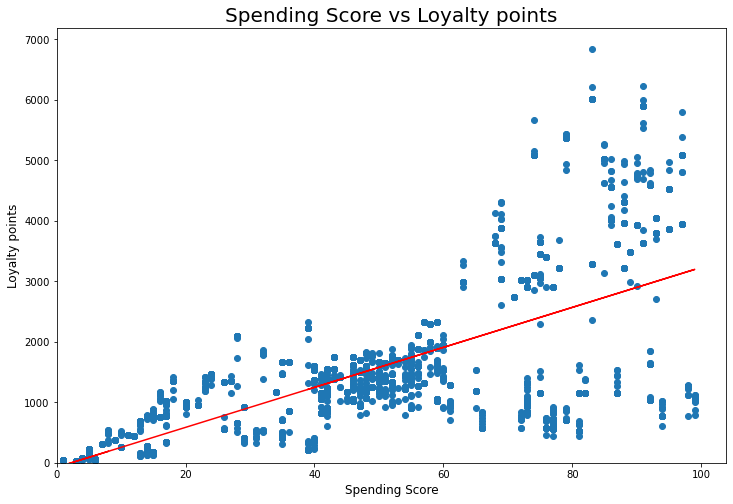

In [18]:
# Plot the graph with a regression line.
# Plot the data points with a scatterplot.
plt.figure(figsize=(12,8))
plt.scatter(x, y)

# Plot the regression line in red
plt.plot(x, model_sp.predict(), color='red')

# Set the x and y limits on the axes
plt.xlim(0)
plt.ylim(0)

# Set the title and labels for the graph.  
plt.title("Spending Score vs Loyalty points", fontsize = 20)
plt.xlabel("Spending Score", fontsize=12)
plt.ylabel("Loyalty points", fontsize=12) 

# View the plot
plt.show()

### 5b) renumeration vs loyalty

In [19]:
# Independent variable.
x = reviews_df['remuneration']
# Dependent variable.
y = reviews_df['loyalty_points']

# OLS model and summary.
f = 'y ~ x'
model_r = ols(f,data=reviews_df).fit()

# OLS summary
model_r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Fri, 23 Dec 2022   Prob (F-statistic):          2.43e-209
Time:                        14:46:00   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
# Extract the estimated parameters.
print("Parameters: \n", model_r.params)

# Extract the standard errors
print("\nStandard errors: \n", model_r.bse)

# Extract the predicted values
print("\nPredicted values: \n", model_r.predict())

Parameters: 
 Intercept   -65.686513
x            34.187825
dtype: float64

Standard errors: 
 Intercept    52.170717
x             0.977925
dtype: float64

Predicted values: 
 [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [21]:
# Set the the X coefficient and the constant to generate the regression table.
y_pred = 34.188 * x -65.686

# View the output.
y_pred

0        354.82640
1        354.82640
2        382.86056
3        382.86056
4        410.89472
           ...    
1995    2821.83248
1996    3102.17408
1997    3102.17408
1998    3298.41320
1999    3102.17408
Name: remuneration, Length: 2000, dtype: float64

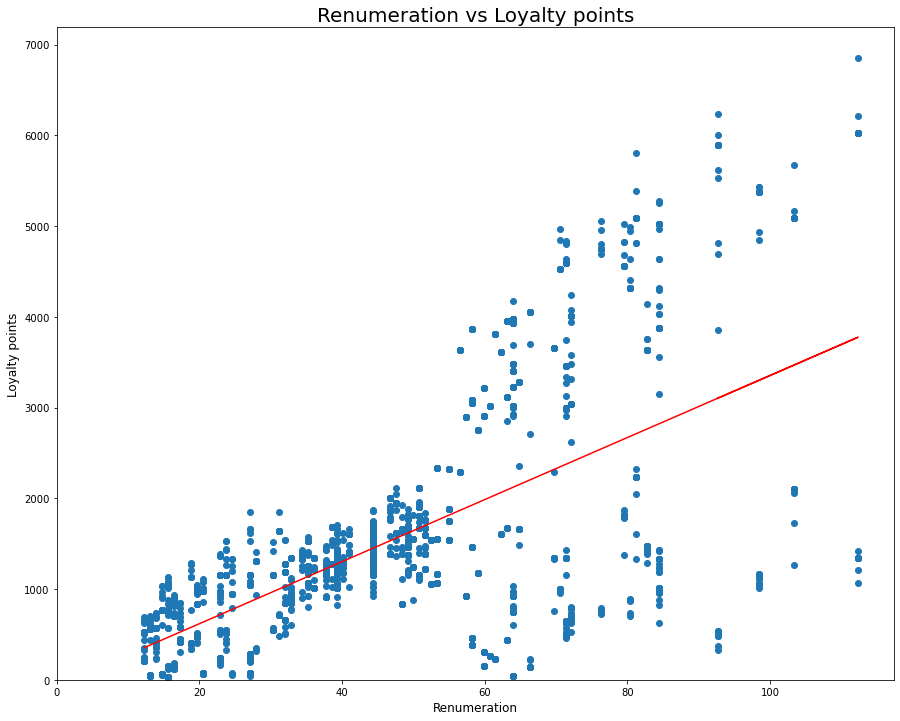

In [22]:
# Plot graph with regression line.
# Plot the data points with a scatterplot.
plt.figure(figsize=(15,12))
plt.scatter(x, y)

# Plot the regression line in red
plt.plot(x, y_pred, color='red')

# Set the x and y limits on the axes
plt.xlim(0)
plt.ylim(0)

# Set the title and labels for the graph.  
plt.title("Renumeration vs Loyalty points", fontsize = 20)
plt.xlabel("Renumeration", fontsize=12)
plt.ylabel("Loyalty points", fontsize=12) 

# View the plot
plt.show()

### 5c) age vs loyalty

In [23]:
# Independent variable.
x = reviews_df['age']

# Dependent variable.
y = reviews_df['loyalty_points']

# OLS model and summary.
f = 'y ~ x'
model_age = ols(f, reviews_df).fit()

model_age.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Fri, 23 Dec 2022   Prob (F-statistic):             0.0577
Time:                        14:46:10   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
# Extract the estimated parameters.
print("Parameters: \n", model_age.params)

# Extract the standard errors.
print("\nStandard errors: \n", model_age.bse)

# Extract the predicted values.
print("\nPredicted values: \n", model_age.predict())

Parameters: 
 Intercept    1736.517739
x              -4.012805
dtype: float64

Standard errors: 
 Intercept    88.248731
x             2.113177
dtype: float64

Predicted values: 
 [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [25]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = -4.012805 * x  + 1736.517739

# View the output.
y_pred

0       1664.287249
1       1644.223224
2       1648.236029
3       1636.197614
4       1604.095174
           ...     
1995    1588.043954
1996    1563.967124
1997    1600.082369
1998    1600.082369
1999    1608.107979
Name: age, Length: 2000, dtype: float64

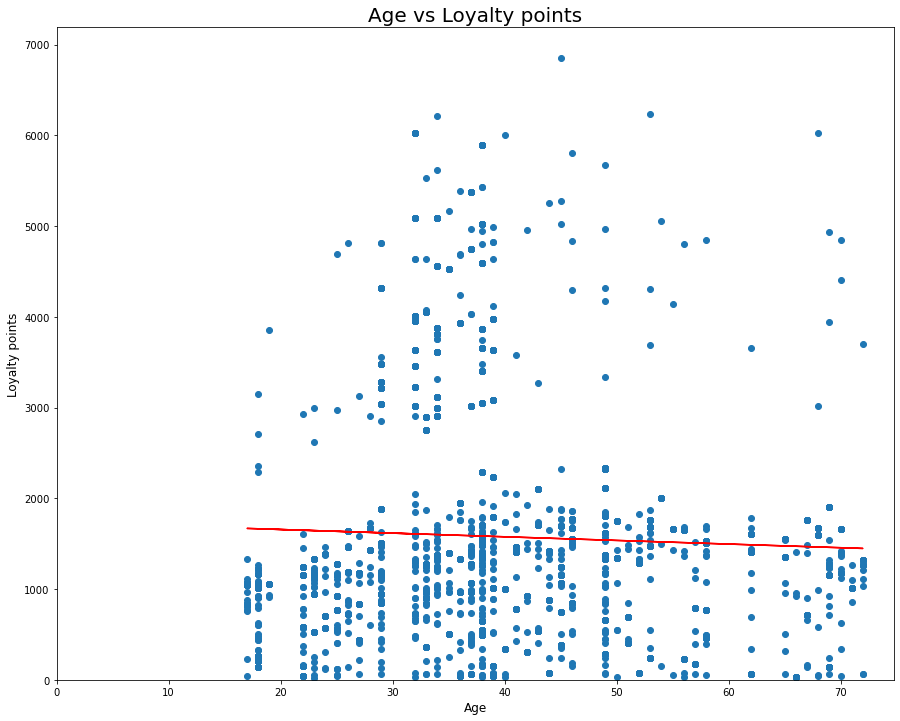

In [26]:
# Plot graph with regression line.

# Plot the data points with a scatterplot.
plt.figure(figsize=(15,12))
plt.scatter(x, y)

# Plot the regression line in red
plt.plot(x, model_age.predict(), color='red')

# Set the x and y limits on the axes
plt.xlim(0)
plt.ylim(0)

# Set the title and labels for the graph.  
plt.title("Age vs Loyalty points", fontsize = 20)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Loyalty points", fontsize=12) 

# View the plot
plt.show()

## 6. Observations and insights

***Your observations here...***






- Simple linear regression models using the OLS method is performed to evaluate possible linear relationships between loyalty points and age/remuneration/spending scores to determine whether these can be used to predict the loyalty points. 

- The spending score and renumeration have a moderate positive correlation while age variable has no correlation with the loyalty points. 

- Customers accumulate loyalty points that depend on spending score and renumeration values. There are outliers in the data.

Data above spending score 60 and loyalty points 3000 show a lot of outliers

Spending score and renumeration can be used to predict the loyalty points. 
The spending score and renumeration needs to be explored further to identify the different groups of customers to target specific market segments.

# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [27]:
# Import necessary libraries.
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import matplotlib.cm as cm
# import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [28]:
# Load the CSV file(s)from Week 1
df = pd.read_csv('reviews_final.csv')

# View DataFrame.
df.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [29]:
# Drop unnecessary columns.
# Create a new dataframe containing renumeration and spending_score columns
df2 = df[['remuneration', 'spending_score']]

# View DataFrame.
df2

,remuneration,spending_score
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40
...,...,...
1995,84.46,69
1996,92.66,8
1997,92.66,91
1998,98.40,16


In [30]:
# Explore the data.
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   remuneration    2000 non-null   float64
 1   spending_score  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


In [31]:
# Descriptive statistics.
df2.describe()

,remuneration,spending_score
count,2000.000000,2000.000000
mean,48.079060,50.000000
std,23.123984,26.094702
min,12.300000,1.000000
25%,30.340000,32.000000
50%,47.150000,50.000000
75%,63.960000,73.000000
max,112.340000,99.000000


## 2. Plot

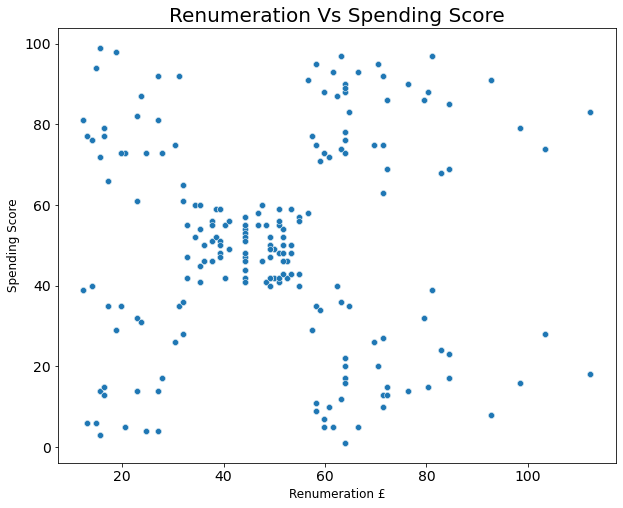

In [32]:
# Create a scatterplot with Seaborn.
plt.figure(figsize=(10,8))
ax = sns.scatterplot(x='remuneration', y='spending_score',data=df2)

# Add titles and labels
ax.set_title("Renumeration Vs Spending Score", fontsize=20)
ax.set_xlabel('Renumeration £', fontsize =12)
ax.set_ylabel('Spending Score', fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=14)

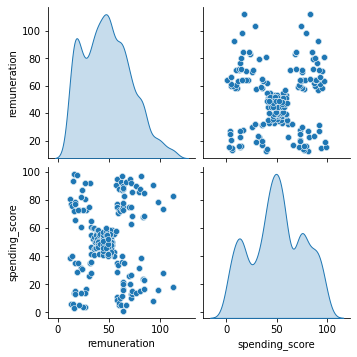

In [33]:
# Create a pairplot with Seaborn.

sns.pairplot(df2, diag_kind='kde')

## 3. Elbow and silhoutte methods

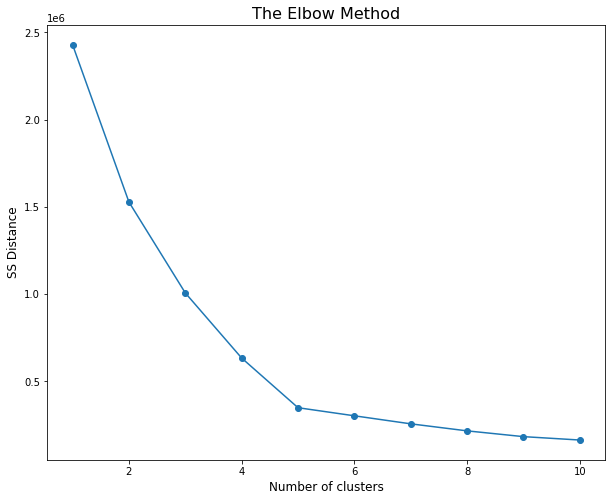

In [34]:
# Determine the number of clusters: Elbow method.
ss = []
x=df2
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                   init='k-means++',
                   max_iter=500,
                   n_init=10,
                   random_state=42)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)
plt.figure(figsize=(10,8))
# Plot the elbow method : sum of squared distances
plt.plot(range(1,11),
        ss, marker='o')

# Specify the title and labels
plt.title("The Elbow Method", fontsize =16)
plt.xlabel("Number of clusters", fontsize =12)
plt.ylabel("SS Distance", fontsize=12)
plt.show()

 - Here 5 or 6 seems to be point where the plot gets linear and this is the optimal number of clusters in the Elbow method. 

In [35]:
# Determine the number of clusters: Silhouette method.
kmax = 10
sil =[]
for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters=k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,labels,metric='euclidean'))
    


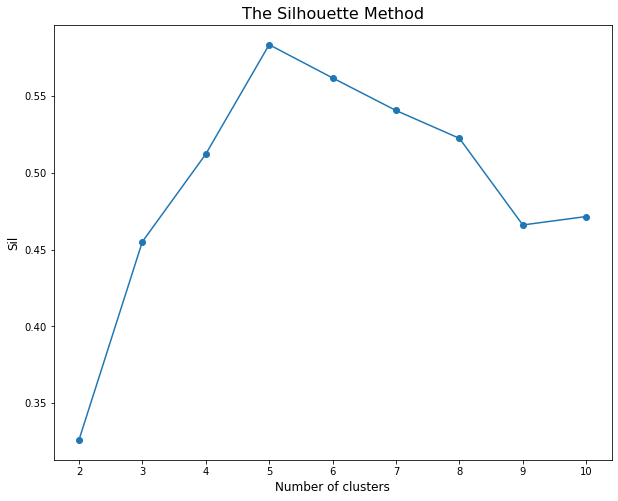

In [36]:
plt.figure(figsize=(10,8))
# Plot the silhouette method
plt.plot(range(2,kmax+1),
        sil, marker='o')

# Specify labels and title
plt.title("The Silhouette Method", fontsize=16)
plt.xlabel("Number of clusters", fontsize=12)
plt.ylabel("Sil", fontsize=12)
plt.show()

- Here 5 seems to have a higher score and can be considered as the optimal number of clusters. 

## 4. Evaluate k-means model at different values of *k*

Text(0.5, 1.05, 'Using k=5 clusters')

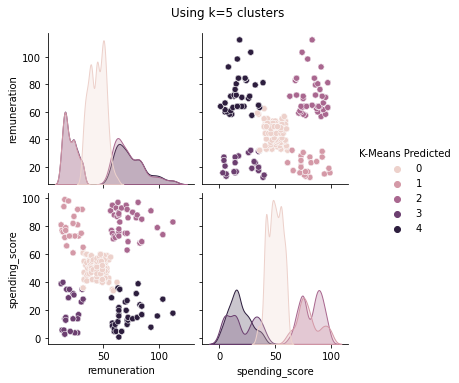

In [37]:
# Using 5 clusters
df_k5 = df2.copy()
kmeans = KMeans(n_clusters=5, max_iter=15000, init='k-means++',random_state=42).fit(x)
clusters = kmeans.labels_
df_k5['K-Means Predicted'] = clusters



# Create a pairplot
ax = sns.pairplot(df_k5, hue='K-Means Predicted', diag_kind='kde')
ax.fig.suptitle('Using k=5 clusters', y = 1.05)

In [38]:
# Check the number of observations per predicted class.
df_k5['K-Means Predicted'].value_counts()

0    774
2    356
4    330
3    271
1    269
Name: K-Means Predicted, dtype: int64

Text(0.5, 1.05, 'Using k=6 clusters')

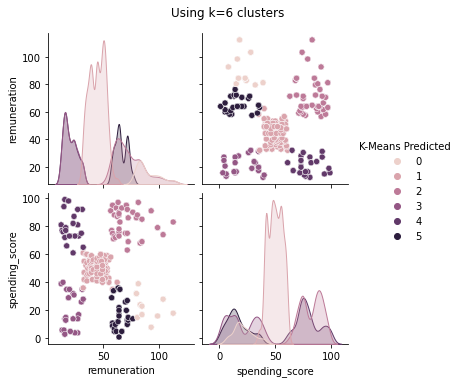

In [39]:
# Using 6 clusters
df_k6=df2.copy()
kmeans = KMeans(n_clusters=6, max_iter=15000, init='k-means++',random_state=42).fit(x)
clusters = kmeans.labels_
df_k6['K-Means Predicted'] = clusters



# Create a pairplot
ax = sns.pairplot(df_k6, hue='K-Means Predicted', diag_kind='kde')
ax.fig.suptitle('Using k=6 clusters', y = 1.05)

In [41]:
# Check the number of observations per predicted class.
df_k6['K-Means Predicted'].value_counts()

1    767
2    356
3    271
4    269
5    214
0    123
Name: K-Means Predicted, dtype: int64

Text(0.5, 1.05, 'Using k=7 clusters')

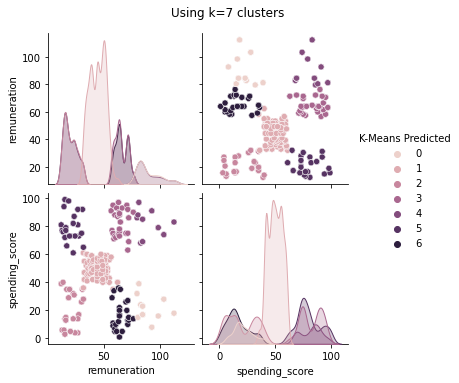

In [42]:
# Using 7 clusters
df_k7 = df2.copy()
kmeans = KMeans(n_clusters=7, max_iter=15000, init='k-means++',random_state=42).fit(x)
clusters = kmeans.labels_
df_k7['K-Means Predicted'] = clusters



# Create a pairplot
ax = sns.pairplot(df_k7, hue='K-Means Predicted', diag_kind='kde')
ax.fig.suptitle('Using k=7 clusters', y = 1.05)

In [43]:
# Check the number of observations per predicted class.
df_k7['K-Means Predicted'].value_counts()

1    767
2    271
5    269
3    238
6    214
0    123
4    118
Name: K-Means Predicted, dtype: int64

## 5. Fit final model and justify your choice

Text(0.5, 1.0, 'Number of clusters = 5')

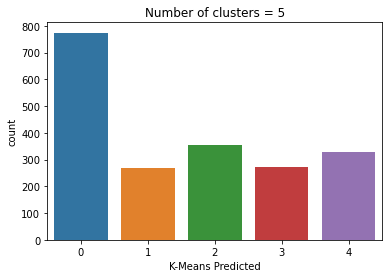

In [44]:
# Visualise the number of observation per predicted class.
sns.countplot(x = 'K-Means Predicted', data = df_k5)
plt.title('Number of clusters = 5')


 Using k = 5 clusters. The number of observation per predicted class are more evenly distributed. 
 There is a higher no. of observations in cluster 0 , where the spending score is 40-60 and renumeration is also in 50 range.  
 


## 6. Plot and interpret the clusters

Text(0, 0.5, 'Spending score')

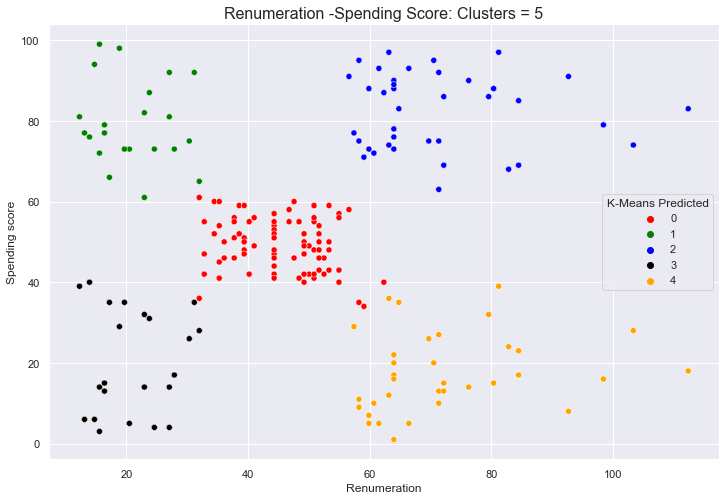

In [45]:
# Apply the final model.
# Visualising the clusters.

sns.set(rc = {'figure.figsize' : (12, 8)})

# Create a scatterplot
ax = sns.scatterplot(x='remuneration',
               y='spending_score',
               data=df_k5,
               hue='K-Means Predicted',
               palette=['red','green','blue','black','orange'])
ax.set_title('Renumeration -Spending Score: Clusters = 5', fontsize=16)
ax.set_xlabel('Renumeration', fontsize=12)
ax.set_ylabel('Spending score', fontsize=12)

In [46]:
# View DataFrame
df_k5

,remuneration,spending_score,K-Means Predicted
0,12.30,39,3
1,12.30,81,1
2,13.12,6,3
3,13.12,77,1
4,13.94,40,3
...,...,...,...
1995,84.46,69,2
1996,92.66,8,4
1997,92.66,91,2
1998,98.40,16,4


In [48]:
df_k5[df_k5['K-Means Predicted'] == 4]

,remuneration,spending_score,K-Means Predicted
124,57.40,29,4
128,58.22,11,4
130,58.22,9,4
134,59.86,5,4
136,59.86,7,4
...,...,...,...
1992,84.46,17,4
1994,84.46,23,4
1996,92.66,8,4
1998,98.40,16,4


## 7. Discuss: Insights and observations

***Your observations here...***

- Using k = 5 clusters. The number of observation per predicted class are more evenly distributed. 
 There is a higher no. of observations in cluster 0 , where the spending score is 40-60 and renumeration is also in £30-50 range. 
 
- K-means predicted = 1 --> high spending score but low renumeration.
- K-means predicted = 4 --> low spending score but higher renumeration values

- Few outliers in clusters 2 and 4 .
- Cluster 2 have high spending score and high renumeration. 

Depending on the renumeration and spending , the different marketing strategies can be utilised for various groups of customer base. 

For example a marketing strategy could be developed to target the Cluster-4 which has the maximum disposable income and lowest spending score. 

# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [49]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download ('punkt')
nltk.download ('stopwords')

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jose_\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jose_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [50]:
# Load the data set as df3.

df3 = pd.read_csv('reviews_final.csv')
# View DataFrame.
df3.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [51]:
# Explore data set.
print(df3.shape)

df3.info()

(2000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


In [52]:
# Keep necessary columns. Drop unnecessary columns.
df3 = df3[['review', 'summary']] 
# View DataFrame.
df3

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap
...,...,...
1995,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Great game. Did not think I would like it whe...,Super fun
1997,Great game for all.........\nKeeps the mind ni...,Great Game
1998,fun game!,Four Stars


In [53]:
# Determine if there are any missing values.
df3.isna().sum()

review     0
summary    0
dtype: int64

There are no missing values in the dataset

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)
### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [54]:
# User-defined function: - 
# 1) To change all characters to lower case
# 2) To remove all punctuation
# In 'review' and 'summary' columns
def lower_punc(col):
    col = col.apply(lambda x : " ".join(x.lower() for x in x.split()))
    # View the results
    print("\nConverting to lower case: ")
    print(col.head())
    # Remove all punctuations
    col = col.str.replace('[^\w\s]','')
    # View result
    print("\nRemove punctuations:")
    print(col.head())
    return col

In [55]:
# 'review' column - change to lowercase and replace punctuations
df3['review'] = lower_punc(df3['review'])


Converting to lower case: 
0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

Remove punctuations:
0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object


In [56]:
# 'summary' column - change to lowercase and replace punctuations
df3['summary'] = lower_punc(df3['summary'])


Converting to lower case: 
0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

Remove punctuations:
0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object


### 2c) Drop duplicates in both columns

In [57]:
# Check duplicates in review column.
df3['review'].duplicated().sum()

50

In [58]:
# Check duplicates in summary column.
df3['summary'].duplicated().sum()

649

In [59]:
# Check duplicates in both column.
df3.duplicated().sum()

39

In [60]:
# Drop duplicates in both columns

df_clean = df3.drop_duplicates(subset=['review','summary'],keep='last')
df_clean.reset_index(inplace=True)
df_clean.head()

,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap


In [61]:
# Check if duplicates have been removed
df_clean.duplicated().sum()

0

## 3. Tokenise and create wordclouds

In [62]:
# Create new DataFrame (copy DataFrame).
df_final = df_clean.copy()

# View DataFrame.
df_final.head()

,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap


In [63]:
# Apply tokenisation to both columns.
# Tokenise 'review' column
df_final['review_token'] = df_final['review'].apply(word_tokenize)

# View DataFrame.
df_final['review_token'].head()

0    [when, it, comes, to, a, dms, screen, the, spa...
1    [an, open, letter, to, galeforce9, your, unpai...
2    [nice, art, nice, printing, why, two, panels, ...
3    [amazing, buy, bought, it, as, a, gift, for, o...
4    [as, my, review, of, gf9s, previous, screens, ...
Name: review_token, dtype: object

In [64]:
# Tokenise 'summary' column
df_final['summary_token'] = df_final['summary'].apply(word_tokenize)

# View DataFrame.
df_final['summary_token'].head()

0    [the, fact, that, 50, of, this, space, is, was...
1    [another, worthless, dungeon, masters, screen,...
2                 [pretty, but, also, pretty, useless]
3                                        [five, stars]
4                                        [money, trap]
Name: summary_token, dtype: object

In [65]:
# User defined function - to combine all comments to a single string 
def to_string(col):
    all_col_string = ''
    for i in range(len(col)):
        # Add each comment to the string
        all_col_string = all_col_string + col[i]
    return all_col_string

In [66]:
# User define function -to create word cloud for the combined string
def word_cloud_generator(col_string):
    word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(col_string) 
    # Plot the wordcloud image.
    plt.figure(figsize = (16, 9), facecolor = None)
    plt.imshow(word_cloud) 
    plt.axis('off') 
    plt.tight_layout(pad = 0) 
    plt.show() 
     

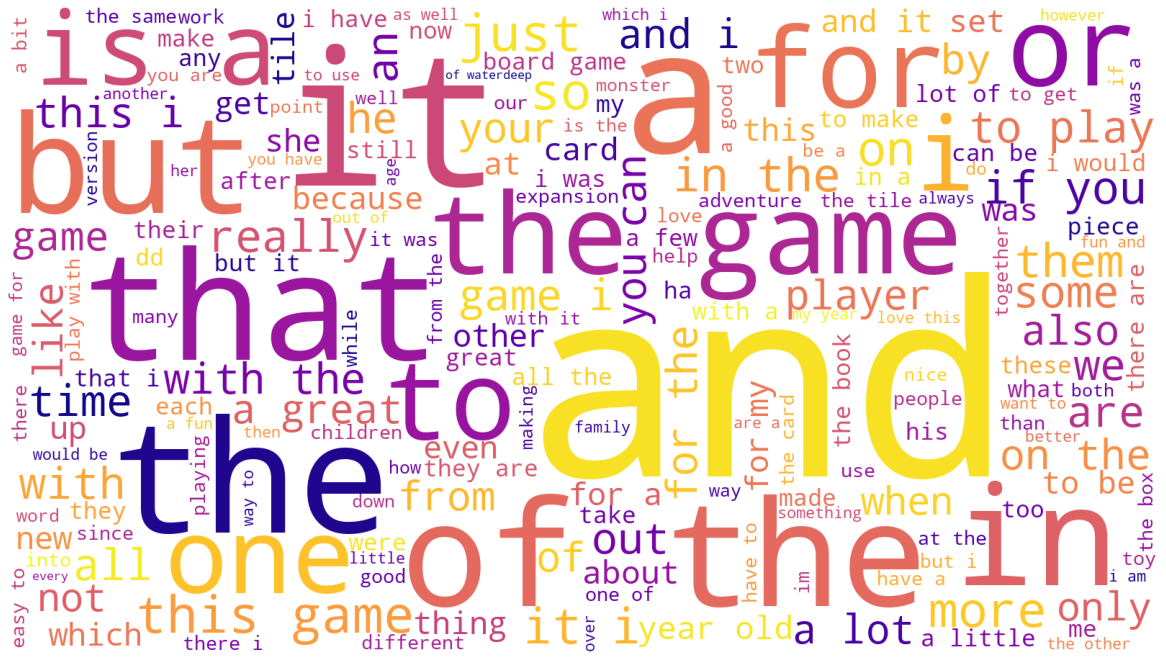

In [67]:
# 'review' column -  to single string and passed through word_cloud_generator function
review_str = to_string(df_final['review'])
word_cloud_generator(review_str)

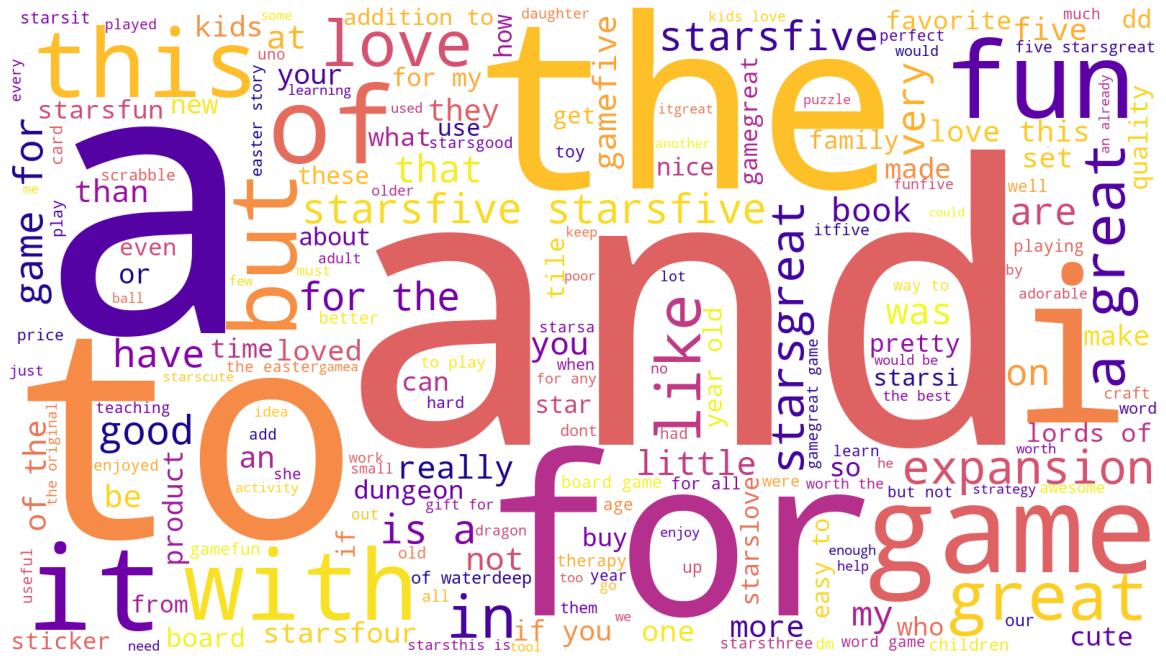

In [68]:
# 'summary' column -  to single string and passed through word_cloud_generator function
summary_str = to_string(df_final['summary'])
word_cloud_generator(summary_str)

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [69]:
# Function to create tokens list:
def tokens_list(col):
    all_tokens = []
    for i in range(len(col)):
        # Add each token to the list.
        all_tokens = all_tokens +col[i]
    return all_tokens

In [70]:
# Frequency Distribution : 'review'
review_all_tokens = tokens_list(df_final['review_token'])
FreqDist(review_all_tokens)


FreqDist({'the': 5451, 'and': 3233, 'to': 3162, 'a': 3160, 'of': 2488, 'i': 2090, 'it': 2083, 'is': 1782, 'this': 1776, 'game': 1671, ...})

In [71]:
# Frequency Distribution : 'summary'
summary_all_tokens = tokens_list(df_final['summary_token'])
FreqDist(summary_all_tokens)

FreqDist({'stars': 427, 'five': 342, 'game': 319, 'great': 295, 'the': 261, 'a': 240, 'for': 232, 'fun': 218, 'to': 192, 'and': 168, ...})

### 4b) Remove alphanumeric characters and stopwords

In [72]:
# Delete all the non-alphanumeric characters
review_all_tokens1 = [word for word in review_all_tokens if word.isalnum()]
summary_all_tokens1= [word for word in summary_all_tokens if word.isalnum()]  

In [73]:
# Remove stop words
# Create a set of English stop words.
english_stopwords = set(stopwords.words('english'))

# 'review'
review_tokens_clean = [word for word in review_all_tokens1 \
                       if word.lower() not in english_stopwords]

# 'summary'
summary_tokens_clean = [word for word in summary_all_tokens1 \
                       if word.lower() not in english_stopwords]

In [74]:
# User defined function:-  To create a tokens string
def tokens_string(tokens):
     # Define an empty string variable
    tokens_str =''
    for value in tokens:
        # Add each filtered token word to the string.
        tokens_str = tokens_str + value + ' '
    
    return tokens_str

### 4c) Create wordcloud without stopwords

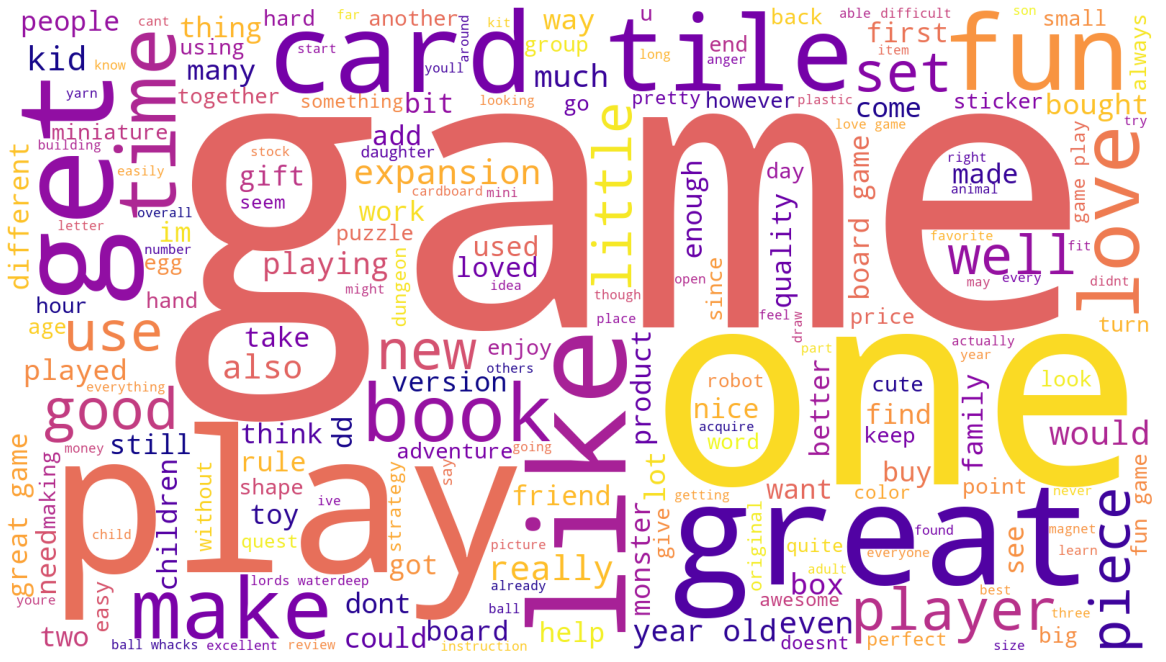

In [75]:
# review : Create token string and pass through word cloud generator function
review_tokens_str = tokens_string(review_tokens_clean)

# review : word cloud without stopwords
word_cloud_generator(review_tokens_str)

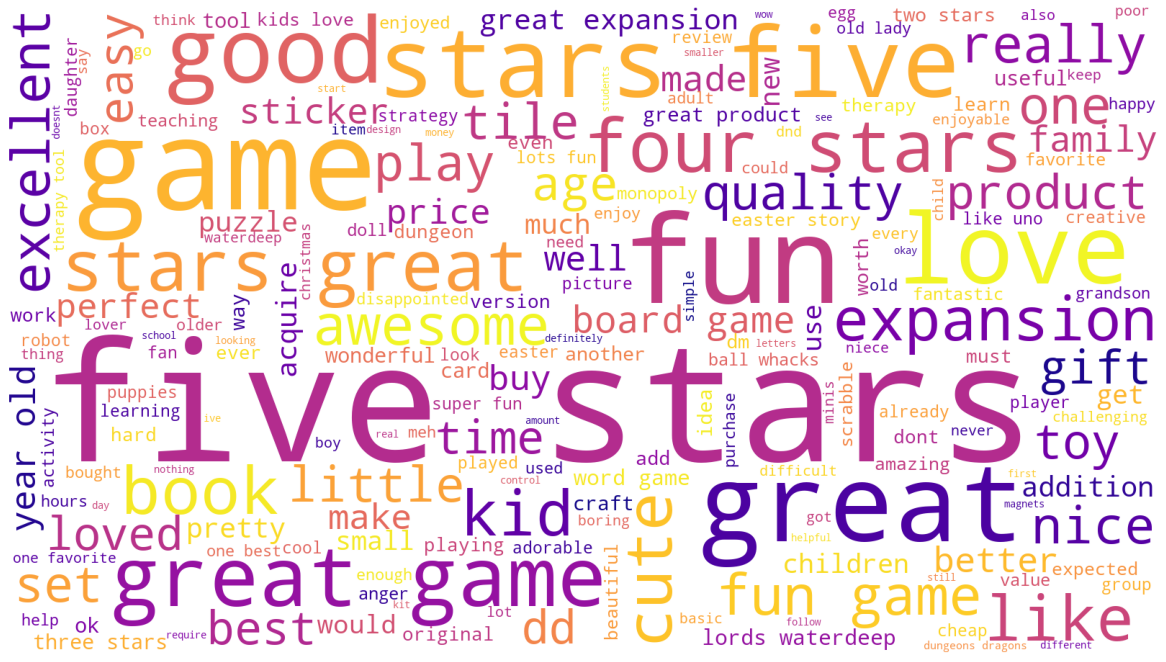

In [76]:
# summary : Create token string and pass through word cloud generator function
summary_tokens_str = tokens_string(summary_tokens_clean)

# summary : word cloud without stopwords
word_cloud_generator(summary_tokens_str)

### 4d) Identify 15 most common words and polarity

In [77]:
# Frequncy distribution of words
# review
FreqDist(review_tokens_clean)


FreqDist({'game': 1671, 'great': 580, 'fun': 552, 'one': 530, 'play': 502, 'like': 414, 'love': 323, 'really': 319, 'get': 319, 'cards': 301, ...})

In [78]:
# summary
FreqDist(summary_tokens_clean)

FreqDist({'stars': 427, 'five': 342, 'game': 319, 'great': 295, 'fun': 218, 'love': 93, 'good': 92, 'four': 58, 'like': 54, 'expansion': 52, ...})

In [79]:
# 15 Most common words in reviews
review_common_count = pd.DataFrame(Counter(review_tokens_clean).most_common(15),
                     columns = ['Word', 'Frequency']).set_index('Word')
print(review_common_count)

        Frequency
Word             
game         1671
great         580
fun           552
one           530
play          502
like          414
love          323
really        319
get           319
cards         301
tiles         297
time          291
good          289
would         280
book          273


In [80]:
# 15 Most common words in Summary
summary_common_count = pd.DataFrame(Counter(summary_tokens_clean).most_common(15),
                     columns = ['Word', 'Frequency']).set_index('Word')
print(summary_common_count)

           Frequency
Word                
stars            427
five             342
game             319
great            295
fun              218
love              93
good              92
four              58
like              54
expansion         52
kids              50
cute              45
book              43
one               38
awesome           36


In [81]:
# Function to plot common words
def plot_common(common_count, color, title):
    
    ax = common_count.plot(kind = 'barh', figsize=(15,12), fontsize=16, colormap= color)

    # Set the labels
    ax.set_xlabel('Count', fontsize=16)
    ax.set_ylabel('Word', fontsize=16)
    ax.set_title(f'{title} : Count of the 15 most frequent words', fontsize=20)

    # Draw the bar labels
    for i in ax.patches:
        ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)), fontsize=12)

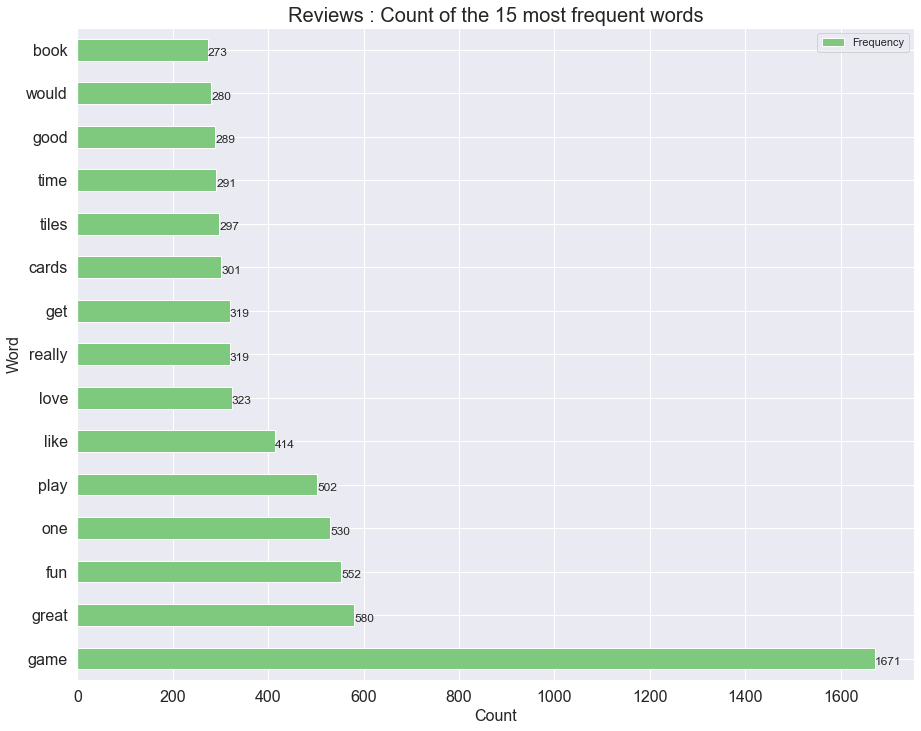

In [82]:
# review : Plot of common words
plot_common(review_common_count, 'Accent' , "Reviews")

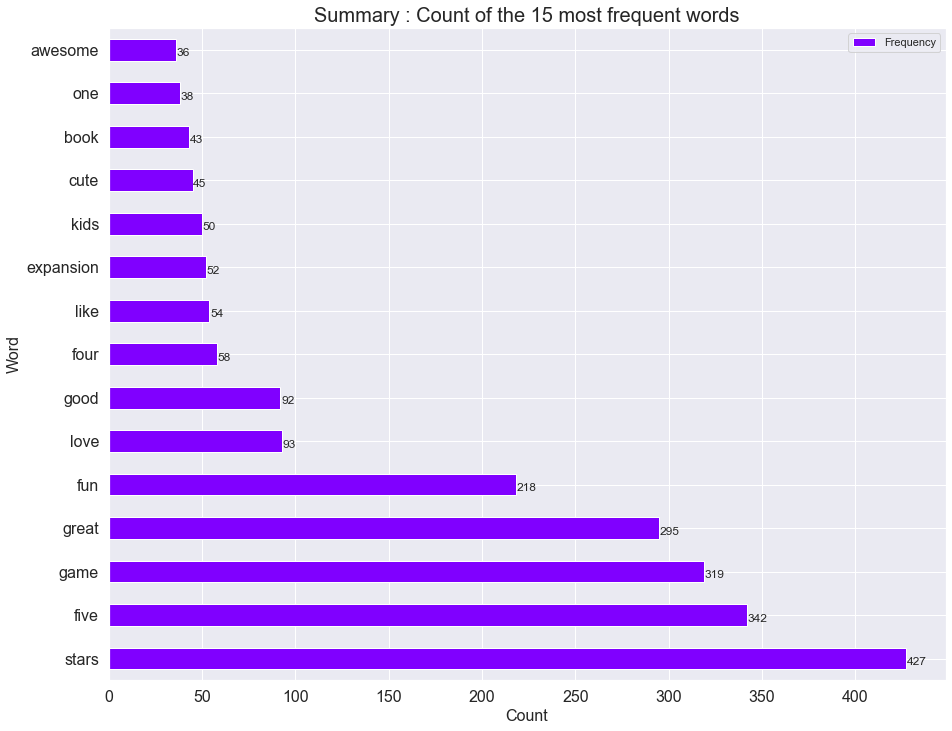

In [83]:
# summary : Plot of common words
plot_common(summary_common_count, 'rainbow', 'Summary')

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [84]:
# Function  to calculate polarity
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [85]:
# Populate a new column with polarity scores for each review
df_final['review_polarity'] = df_final['review'].apply(generate_polarity)

# View the results
df_final['review_polarity'].describe()

count    1961.000000
mean        0.213170
std         0.260360
min        -1.000000
25%         0.045833
50%         0.177222
75%         0.351562
max         1.000000
Name: review_polarity, dtype: float64

In [86]:
# Populate a new column with polarity scores for each summary
df_final['summary_polarity'] = df_final['summary'].apply(generate_polarity)

# View the results
df_final['summary_polarity'].describe()

count    1961.000000
mean        0.223678
std         0.337507
min        -1.000000
25%         0.000000
50%         0.100000
75%         0.475000
max         1.000000
Name: summary_polarity, dtype: float64

In [87]:
# Function :- To plot histogram for polarity
def plot_histogram(col, color, title):
    # Set the plot area
    plt.figure(figsize=(16,9))
    sns.set_style('darkgrid')
    # Define the bars
    plt.hist(col, bins=15, facecolor=color, alpha=0.6)

    # Set the labels
    plt.xlabel('Polarity', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.title(f'{title} : Histogram of sentiment score polarity', fontsize=20)
    plt.show()


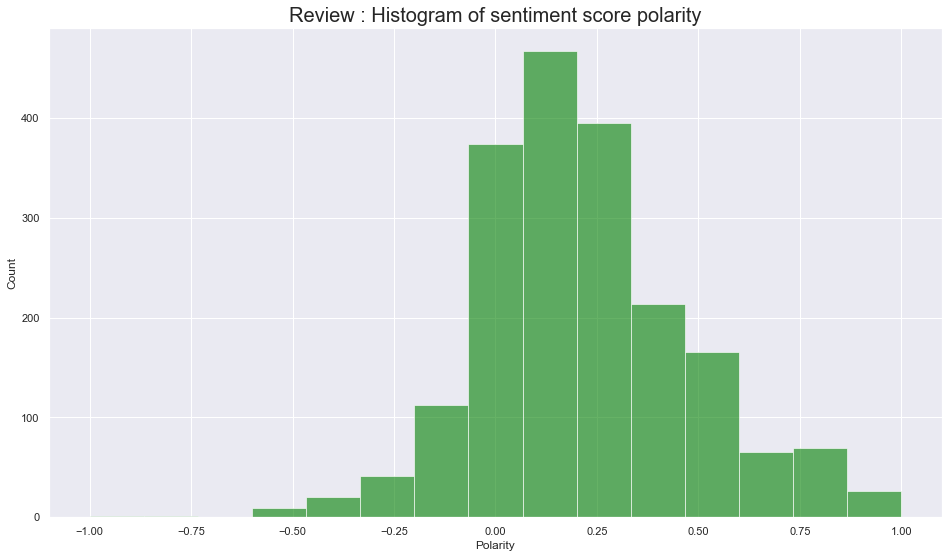

In [88]:
# Histogram of sentiment score polarity for 'review' 
plot_histogram(df_final['review_polarity'], 'green', 'Review')

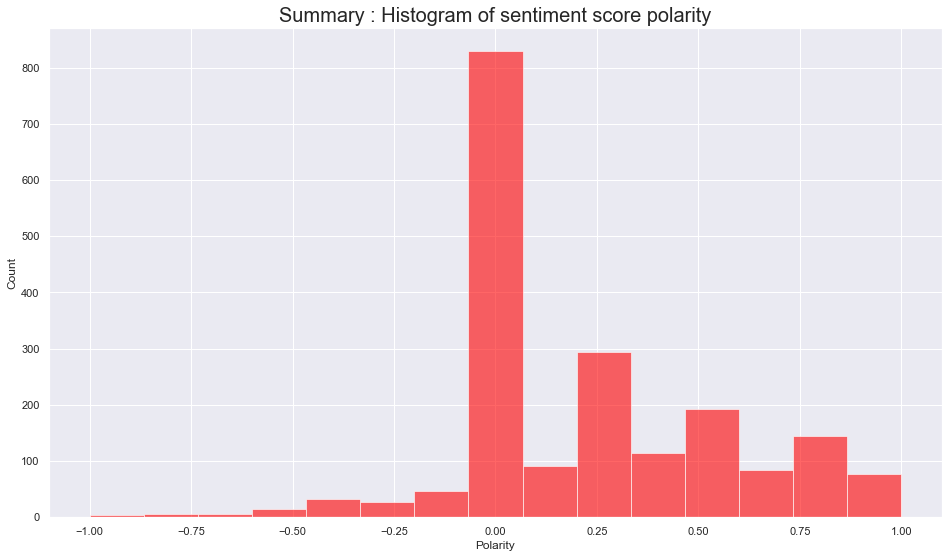

In [89]:
# Histogram of sentiment score polarity for 'summary' 
plot_histogram(df_final['summary_polarity'], 'red', 'Summary')

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [90]:
# Top 20 negative reviews 
# Create a DataFrame
negative_review = df_final.nsmallest(20, 'review_polarity')

# Eliminate unnecessary columns
negative_review = negative_review[['review', 'review_polarity']]

# Adjust the column width
negative_review.style.set_properties(subset=['review'], **{'width' : '1200px'})

,review,review_polarity
203,booo unles you are patient know how to measure i didnt have the patience neither did my daughter boring unless you are a craft person which i am not,-1.000000
177,incomplete kit very disappointing,-0.780000
1769,im sorry i just find this product to be boring and to be frank juvenile,-0.583333
357,one of my staff will be using this game soon so i dont know how well it works as yet but after looking at the cards i believe it will be helpful in getting a conversation started regarding anger and what to do to control it,-0.550000
112,i bought this as a christmas gift for my grandson its a sticker book so how can i go wrong with this gift,-0.500000
222,this was a gift for my daughter i found it difficult to use,-0.500000
225,i found the directions difficult,-0.500000
285,instructions are complicated to follow,-0.500000
295,difficult,-0.500000
1492,expensive for what you get,-0.500000


In [91]:
# Top 20 negative summaries
# Create a DataFrame
negative_summary = df_final.nsmallest(20, 'summary_polarity')

# Eliminate unnecessary columns
negative_summary = negative_summary[['summary', 'summary_polarity']]

# Adjust the column width
negative_summary.style.set_properties(subset=['summary'], **{'width' : '1200px'})

,summary,summary_polarity
21,the worst value ive ever seen,-1.000000
203,boring unless you are a craft person which i am,-1.000000
812,boring,-1.000000
1141,before this i hated running any rpg campaign dealing with towns because it,-0.900000
1,another worthless dungeon masters screen from galeforce9,-0.800000
139,disappointed,-0.750000
618,disappointed,-0.750000
778,disappointed,-0.750000
1585,disappointed,-0.750000
356,promotes anger instead of teaching calming methods,-0.700000


In [92]:
# Top 20 positive reviews
# Create a DataFrame
positive_review = df_final.nlargest(20, 'review_polarity')

# Eliminate unnecessary columns
positive_review = positive_review[['review', 
                                         'review_polarity']]

# Adjust the column width
positive_review.style.set_properties(subset=['review'], **{'width' : '900px'})

,review,review_polarity
7,came in perfect condition,1.000000
160,awesome book,1.000000
189,awesome gift,1.000000
484,excellent activity for teaching selfmanagement skills,1.000000
512,perfect just what i ordered,1.000000
578,wonderful product,1.000000
596,delightful product,1.000000
608,wonderful for my grandson to learn the resurrection story,1.000000
775,perfect,1.000000
1015,awesome,1.000000


In [93]:
# Top 20 positive summaries
# Create a DataFrame
positive_summary = df_final.nlargest(20, 'summary_polarity')

# Eliminate unnecessary columns
positive_summary = positive_summary[['summary', 
                                         'summary_polarity']]

# Adjust the column width
positive_summary.style.set_properties(subset=['summary'], **{'width' : '900px'})

,summary,summary_polarity
6,best gm screen ever,1.000000
28,wonderful designs,1.000000
32,perfect,1.000000
76,theyre the perfect size to keep in the car or a diaper,1.000000
129,perfect for preschooler,1.000000
135,awesome sticker activity for the price,1.000000
156,awesome book,1.000000
158,he was very happy with his gift,1.000000
182,awesome,1.000000
205,awesome and welldesigned for 9 year olds,1.000000


## 7. Discuss: Insights and observations

***Your observations here...***

### Summary :
The review and summary columns are cleaned and analysed for NLP to evaluate the sentiment of the customers. 

Tokenisation is performed , Frequency distribution of the words are calculated and word cloud images are plotted . Removing stopwords create a better word cloud image. 

The most common words are identified. 'Game' has the highest frequency of 1671 times. The summary column shows 'stars' as the most common word , followed by 'five'. 
'great' and 'fun' are other common words implying they are mostly positive reviews and summaries. 

 - Histogram of the sentiment scores shows a positive skewed distribution with high neutral count.
 
 - Some of the top negative reviews, though with a negative polarity score, the review is a good one. This needs to be analysed further. Eg:'was a gift for my son he loves the game'	-0.400000
 
 Overall with the favorable neutral and positive sentiments, the marketing campaigns can utilise social media to improve sales. 

# 